In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

excel_path = "Data set.xlsx"
sheet_names = ["Transient IC2(1)"]
data = {sheet_name: pd.read_excel(excel_path, sheet_name=sheet_name) for sheet_name in sheet_names}

inputs = data["Transient IC2(1)"]

X = inputs.iloc[:, 1:7].values.astype(np.float32)
y_ic2_1 = inputs.iloc[:, 7:13].values.astype(np.float32)

input_names = ['TL1 Length (mm)', 'TL2 Length (mm)', 'R1 (Ohm)', 'TL1 Impedance (Ohm)', 'TL2 Impedance (Ohm)']
output_names = ['Maximum (V)', 'Minimum (V)', 'Overshoot 1st Rising (V)', 'Rise Time 20/80 (ns)', 'Fall Time 20/80 (ns)','Slew Rate Setup rising (V/ns)']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_ic2_1_scaled = scaler_y.fit_transform(y_ic2_1)

model_ic2_1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,), name='input_layer'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer1'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer2'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer3'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer4'),
    keras.layers.Dense(6, name='output_layer_ic2_1')
], name='FFN_model_ic2_1')

model_ic2_1.compile(optimizer='adam', loss='mse')

X_train_ic2_1, X_test_ic2_1, y_ic2_1_train, y_ic2_1_test = train_test_split(X_scaled, y_ic2_1_scaled, test_size=0.2, random_state=42)

history_ic2_1 = model_ic2_1.fit(X_train_ic2_1, y_ic2_1_train, epochs=200, validation_data=(X_test_ic2_1, y_ic2_1_test))

loss_ic2_1 = model_ic2_1.evaluate(X_test_ic2_1, y_ic2_1_test)
print("IC2(1) Test Loss:", loss_ic2_1)

mse = mean_squared_error(y_ic2_1_test, model_ic2_1.predict(X_test_ic2_1))
print('Mean Squared Error (MSE):', mse)

mae = mean_absolute_error(y_ic2_1_test, model_ic2_1.predict(X_test_ic2_1))
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(y_ic2_1_test, model_ic2_1.predict(X_test_ic2_1))
print('R-squared (R2) Score:', r2)

predictions_ic2_1 = scaler_y.inverse_transform(predictions_ic2_1_scaled)

model_ic2_1.save("model_ic2_1.h5")


Epoch 1/200
13/13 [==============================] - 2s 31ms/step - loss: 0.9093 - val_loss: 0.7187
Epoch 2/200
13/13 [==============================] - 0s 10ms/step - loss: 0.5235 - val_loss: 0.3004
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 0.2361 - val_loss: 0.1614
Epoch 4/200
13/13 [==============================] - 0s 10ms/step - loss: 0.1601 - val_loss: 0.1090
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1182 - val_loss: 0.0763
Epoch 6/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0969 - val_loss: 0.0635
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0858 - val_loss: 0.0513
Epoch 8/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0739 - val_loss: 0.0426
Epoch 9/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0654 - val_loss: 0.0456
Epoch 10/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0615 - val_loss: 0.0334
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 3ms/step


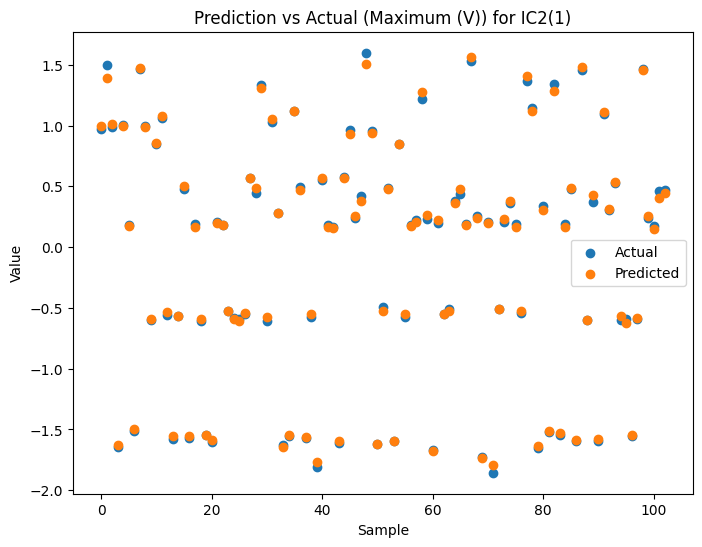

4/4 [==============================] - 0s 3ms/step


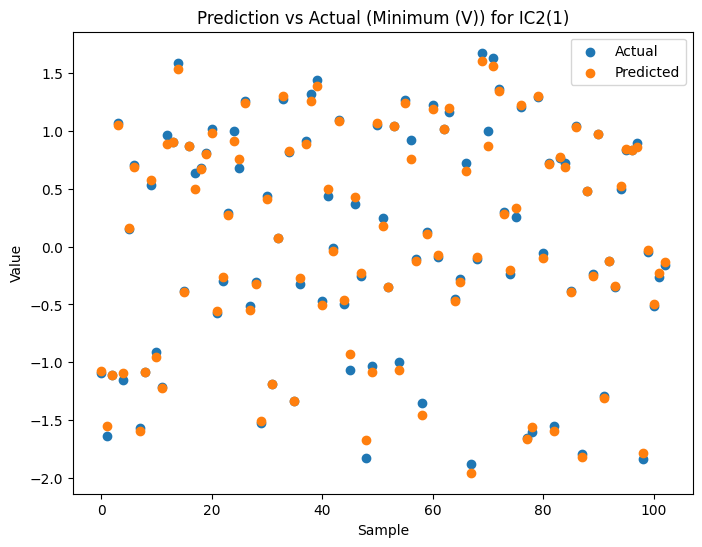

4/4 [==============================] - 0s 4ms/step


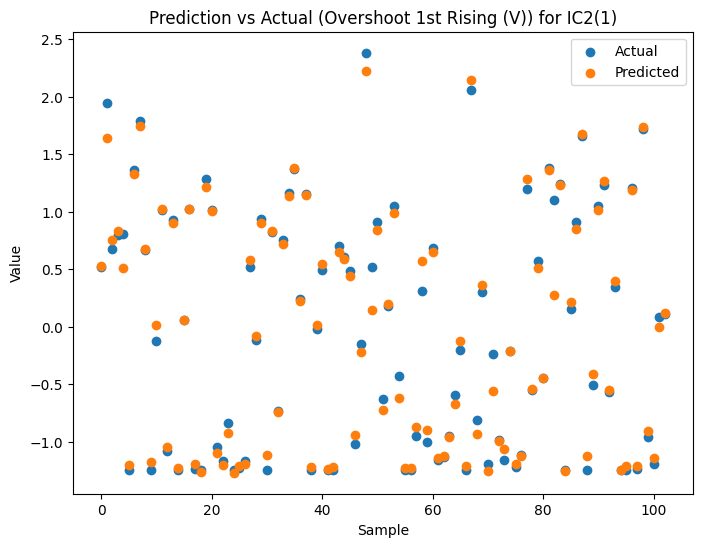

4/4 [==============================] - 0s 3ms/step


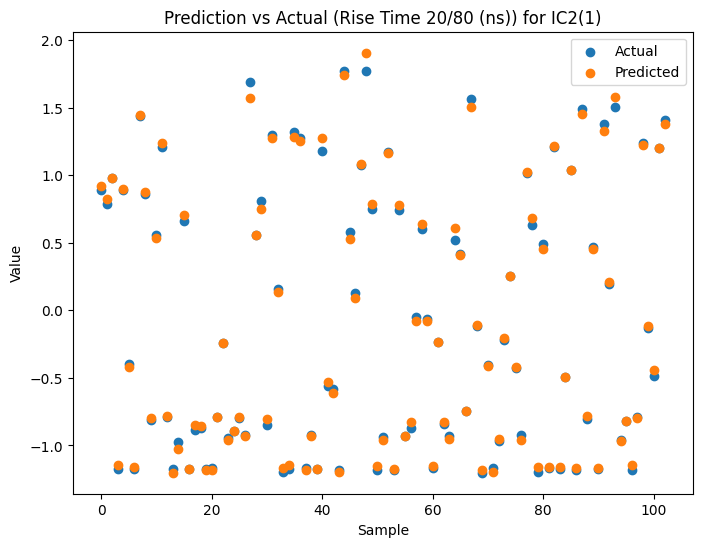

4/4 [==============================] - 0s 3ms/step


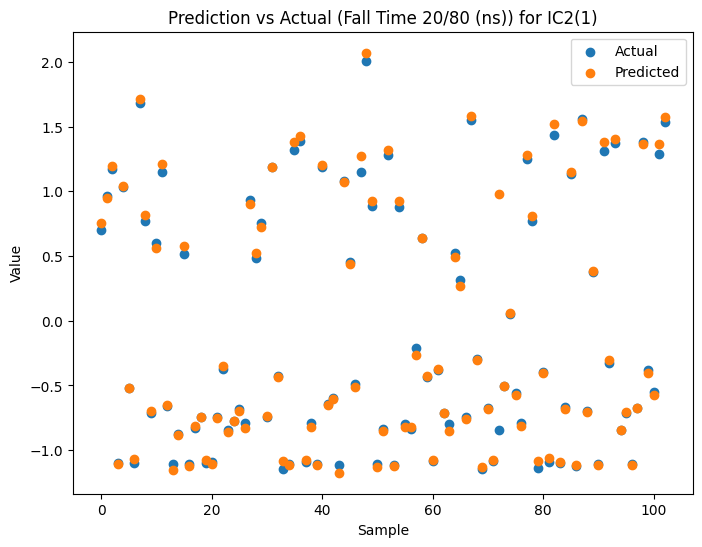

4/4 [==============================] - 0s 4ms/step


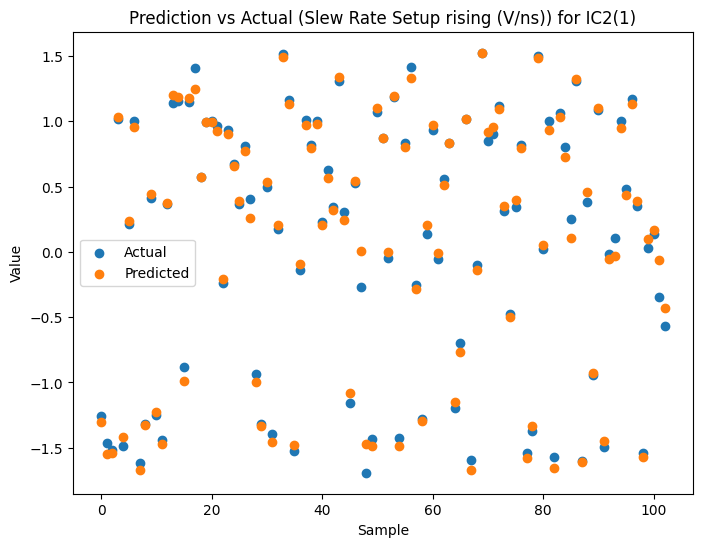

In [ ]:
for i, output_name in enumerate(output_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_ic2_1_test)), y_ic2_1_test[:, i], label='Actual')
    plt.scatter(range(len(y_ic2_1_test)), model_ic2_1.predict(X_test_ic2_1)[:, i], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title(f'Prediction vs Actual ({output_name}) for IC2(1)')
    plt.legend()
    plt.show()